In [ ]:
! pip install scipy==1.7.1
! pip install matplotlib==3.3.2
! pip install numpy==1.20.2
# different from enf_extraction_example.ipynb notebook because we need correlation_lags function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
# pyenf script produces zeros at the end because of window function
audio = np.load('audio.npy')[:-3]
audio_reference = np.load('audio_reference.npy')[:-3]

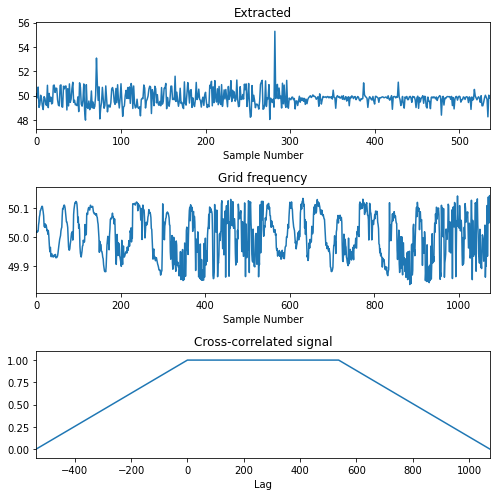

In [3]:
audio_values = [x[0] for x in audio]
audio_reference_values = [x[0] for x in audio_reference]

# added noise to prove working
noise = np.random.normal(0, 0.01, len(audio_reference_values))
audio_reference_values_with_noise = np.concatenate([audio_reference_values, audio_reference_values + noise])

# cross correlation
correlation = signal.correlate(audio_reference_values_with_noise, audio_values, "full")
lags = signal.correlation_lags(len(audio_reference_values_with_noise), len(audio_values), "full")
# normalization
correlation /= np.max(correlation)

fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, figsize=(7, 7))
ax_orig.plot(audio_values)
ax_orig.set_title('Extracted')
ax_orig.set_xlabel('Sample Number')
ax_noise.plot(audio_reference_values_with_noise)
ax_noise.set_title('Grid frequency')
ax_noise.set_xlabel('Sample Number')
ax_corr.plot(lags, correlation)
ax_corr.set_title('Cross-correlated signal')
ax_corr.set_xlabel('Lag')
ax_orig.margins(0, 0.1)
ax_noise.margins(0, 0.1)
ax_corr.margins(0, 0.1)
fig.tight_layout()
plt.show()